In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mne


Bad key "text.kerning_factor" on line 4 in
/Users/Qianqian/anaconda3/envs/ml/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [10]:
raw = mne.io.read_raw_egi('../../aug8-2018-9_20180808_113821.mff', preload=True)

Reading EGI MFF Header from ../../aug8-2018-9_20180808_113821.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 1344121  =      0.000 ...  1344.121 secs...


In [11]:
raw.set_channel_types({'E62': 'eog'})
raw.drop_channels('E65')
raw = raw.copy().crop(300, 360)

Effective window size : 2.048 (s)


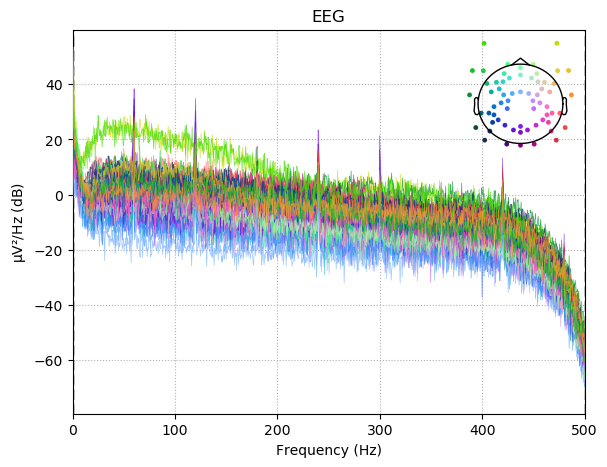

In [26]:
%matplotlib qt
raw.plot_psd(area_mode='range', tmax=10.0, average=False) # power spectual density

In [12]:
raw.notch_filter(np.arange(60, 500, 60), filter_length='auto',phase='zero')

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



<RawMff | signal1.bin, 66 x 60001 (60.0 s), ~30.3 MB, data loaded>

Effective window size : 2.048 (s)


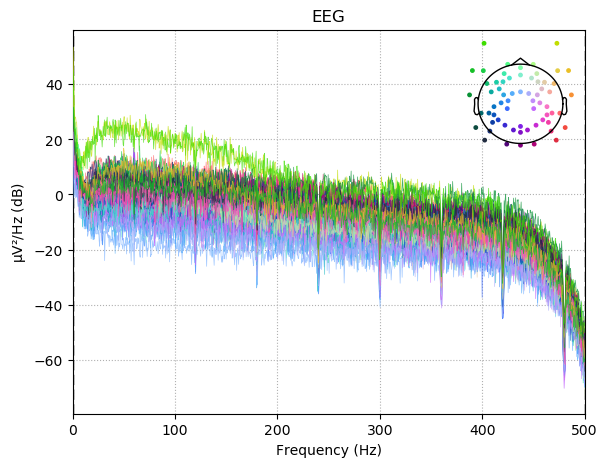

In [28]:
raw.plot_psd(area_mode='range', tmax=10.0, average=False) # power spectual density

In [13]:
raw.filter(0.5, 40, picks=['eeg'])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 sec)



<RawMff | signal1.bin, 66 x 60001 (60.0 s), ~30.3 MB, data loaded>

Effective window size : 2.048 (s)


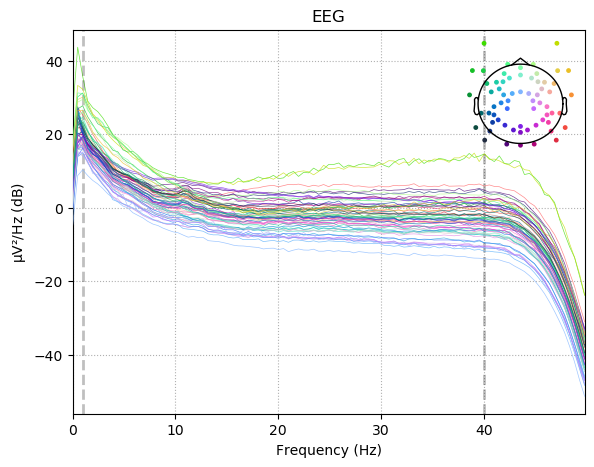

In [43]:
raw.plot_psd(tmax=np.inf, fmax=50)

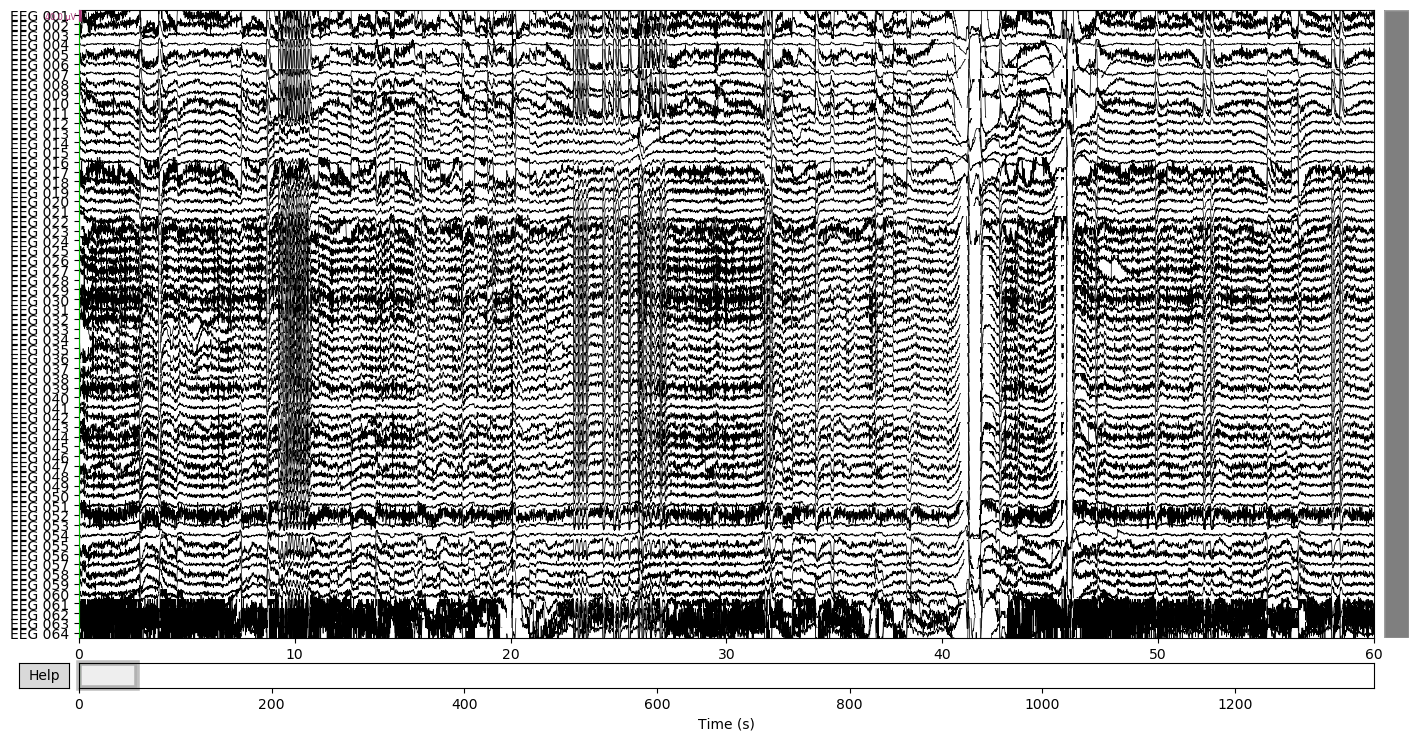

In [44]:
eeg_channels = mne.pick_types(raw.info, eeg=True)
raw.plot(duration=60, order=eeg_channels, n_channels=len(eeg_channels),
         remove_dc=False)

In [14]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))

EOG channel index for this subject is: [61]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 23 significant peaks
Number of EOG events detected : 23
Not setting metadata
Not setting metadata
23 matching events found
Applying baseline correction (mode: mean)
Loading data for 23 events and 1001 original time points ...
1 bad epochs dropped


Not setting metadata
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


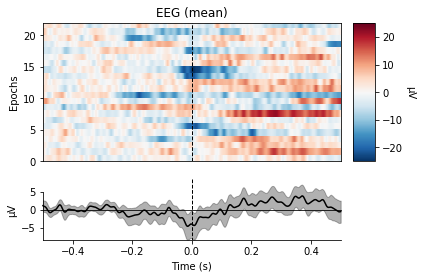

No projector specified for this dataset. Please consider the method self.add_proj.


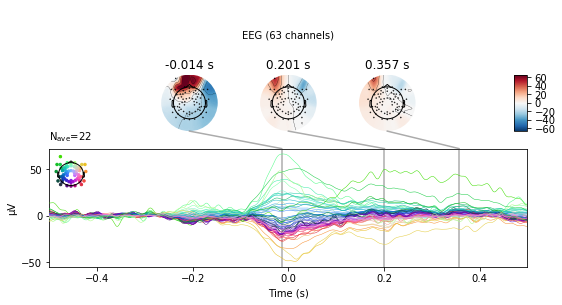

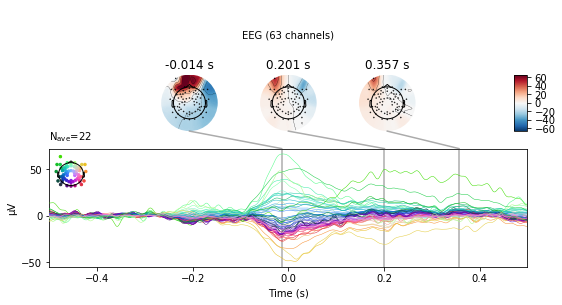

In [15]:
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot_joint()

- possible reasons that cause difference between our data and the tutorial data:

    - different study task (todo: figure out what dataset was used in the tutorial)
        - ours has long fixation time with eye movements and occasionaly glancing at the keyboard
        - long task time
    - difference in equipment
        - electrode standard/reading difference
    - problems with original data (invalid data):
        - electrode issues (place & failure)
        - higher impedence in later portion of the trial (sensor drying out) 
        - individual difference in sweatiness/skin type that causes impedence change
        - signal changing over time due to sweating and stress
        - wire connection
        - noise introduced
    - preprocessing
        - take raw .mff file
        - filtering 0.1 Hz high pass 40Hz low pass for all 64 channels 
            should not make a difference in eog detection
        - 60Hz notch filter for electric noise
        - 
    - artifact detection
        - the detected signals are not eye blinks (check eog detection algorithms)
        - different set of electrodes (use electrodes from both sides)
    - plotting error
        - find out signals being averaged
        - 

TODO:
- check with 1 electrode (electrode only above/below the eyes)
- run the code with eample data (if above doesn't look similar to the example)
- Next steps
    - Manual rejection of bad epochs (head movement, electrode jump, general jump in data)
        - reject time window entirely - loses the signal
    - ICA